# Ciência dos Dados
## Projeto 2 - Walmart
### Integrantes do Grupo

* Antônio Amaral Egydio Martins
* Arthur Martins de Souza Barreto

### Professor Orientador
* Maria Kelly Venezuela

___

### Índice

___
### Proposta Norteadora
* Contextualização:
* Objetivo:

Buscamos entender como o meio interno e externo impactam diretamente na quantidade de itens vendidos no WalMart nos Estados Unidos entre 5/2/2010 até 1/11/2012. Sendo assim para este trabalho utilizaremos como Feature interna o ID da loja - que pode impactas nas vendas por existirem diferentes lojas em diferentes locais… - e como Features Externas os índices CPI (Prevailing consumer price index), Fuel Price, Unemployment e Temperature que afetam diretamente o bem estar e poder aquisitivo do consumidor - podendo aumentar ou reduzir seu consumo semanal.
____

### Introdução
* Importando bibliocas utilizadas:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
import random

# bibliotecas para analize e predições
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

* Importando base de dados

In [2]:
#Checando Diretório 
print("Esperamos trabalhar no diretório")
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\arthu\Desktop\Documentos\Insper\2º_Periodo\Ciencia_dos_dados\Formula1


In [3]:
df = pd.read_csv('Walmart_Store_sales.csv')
df.describe()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


* Funções

In [4]:
# Função para definir o grupo dado a correlação da loja
def grupo(Data):
    # se correlação da temperatura for menor que -0.3, temos o grupo -1, correlaçãoo modera forte negativa
    if Data < -0.3:
        return -1
    # se for maior que 0.4, temos o grupo 1, correlação moderada forte positica
    elif Data > 0.3:
        return 1
    else:
        # caso contrario, temos o grupo 0, ou seja, correlação fraca, seja negativa ou positiva
        return 0

def lista_datas ():
    Dados = df.loc[df["Store"]==1,:]
    Date = Dados["Date"]
    Date.sort_values()
    return Date.tolist()

def correlacao (DataFrame,indicadores, target, store):#Criando Dicionario Principal - Será Base do Novo DataFrame de Correlações
    principal = {}
    dads = DataFrame
    for loja in range(1,46):
        #Dicionario Index
        secundario = {}
        #Separando dados de lojas individuais
        Dados = dads.loc[dads[store]==loja,:]
        for indicador in indicadores:
            #Pegando Dados de Indicadores escolhidos da Loja Inputada e adicionando ao Index
            corr = Dados[target].corr(Dados[indicador])
            secundario[indicador] = corr
        principal[loja] = secundario
    X_Data = pd.DataFrame.from_dict(principal).transpose()
    return X_Data

def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [5]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### Analise Exploratoria

Após o termico do carregamento da base de dados, e a checagem da integridade dos dados que serão utilizados. Haverá o inicio da Analise Exploratoria que terá foco inicial em apresentar informações básicas sobre as Features e Target utilizadas.

___
<center><b>Dicionário de dados do DataSet:</b></center>


Variável | Descrição
:---:|---:
Store | ID de Reconhecimento das Lojas
Weekly_Sales | Vendas Semanais
Holiday_Flag | Variavel Booleana para Feriados 
Temperature | Temperatura Exterior as lojas (Fahrenheit)
Fuel_Price | Preço do Galão de Combustivel (USD)
CPI (Prevailing consumer price index) | Unidade utilizada para medir inflação
Unemployment | Taxa de Desemprego (%)

<center>A variável *Holiday_Flag* identifica se é feriado ou não de forma Booleana.</center>

Valor | Significado
:---:|:---:
0 | É Feriado
1 | Não é Feriado

___

#### Target:
    - Weekly Sales
#### Features:
    - Holiday Flag
    - Temperature
    - Fuel Price
    - CPI
    - Unemployment
    
___

#### Visualização Gráfica

Nesta Seção será realizado o Plot de Gráficos Temporais e Correlacionais, para estabelecer a apresentação visual dos dados com relação ao tempo, e já pré-definir correlações entre os mesmos.

As <b>Features</b> usadas serão:
* `Temperature`
* `Fuel_Price`
* `CPI`
* `Unemployment`

E da Variavel principal <b>Target</b>:
* `Weekly_Sales`

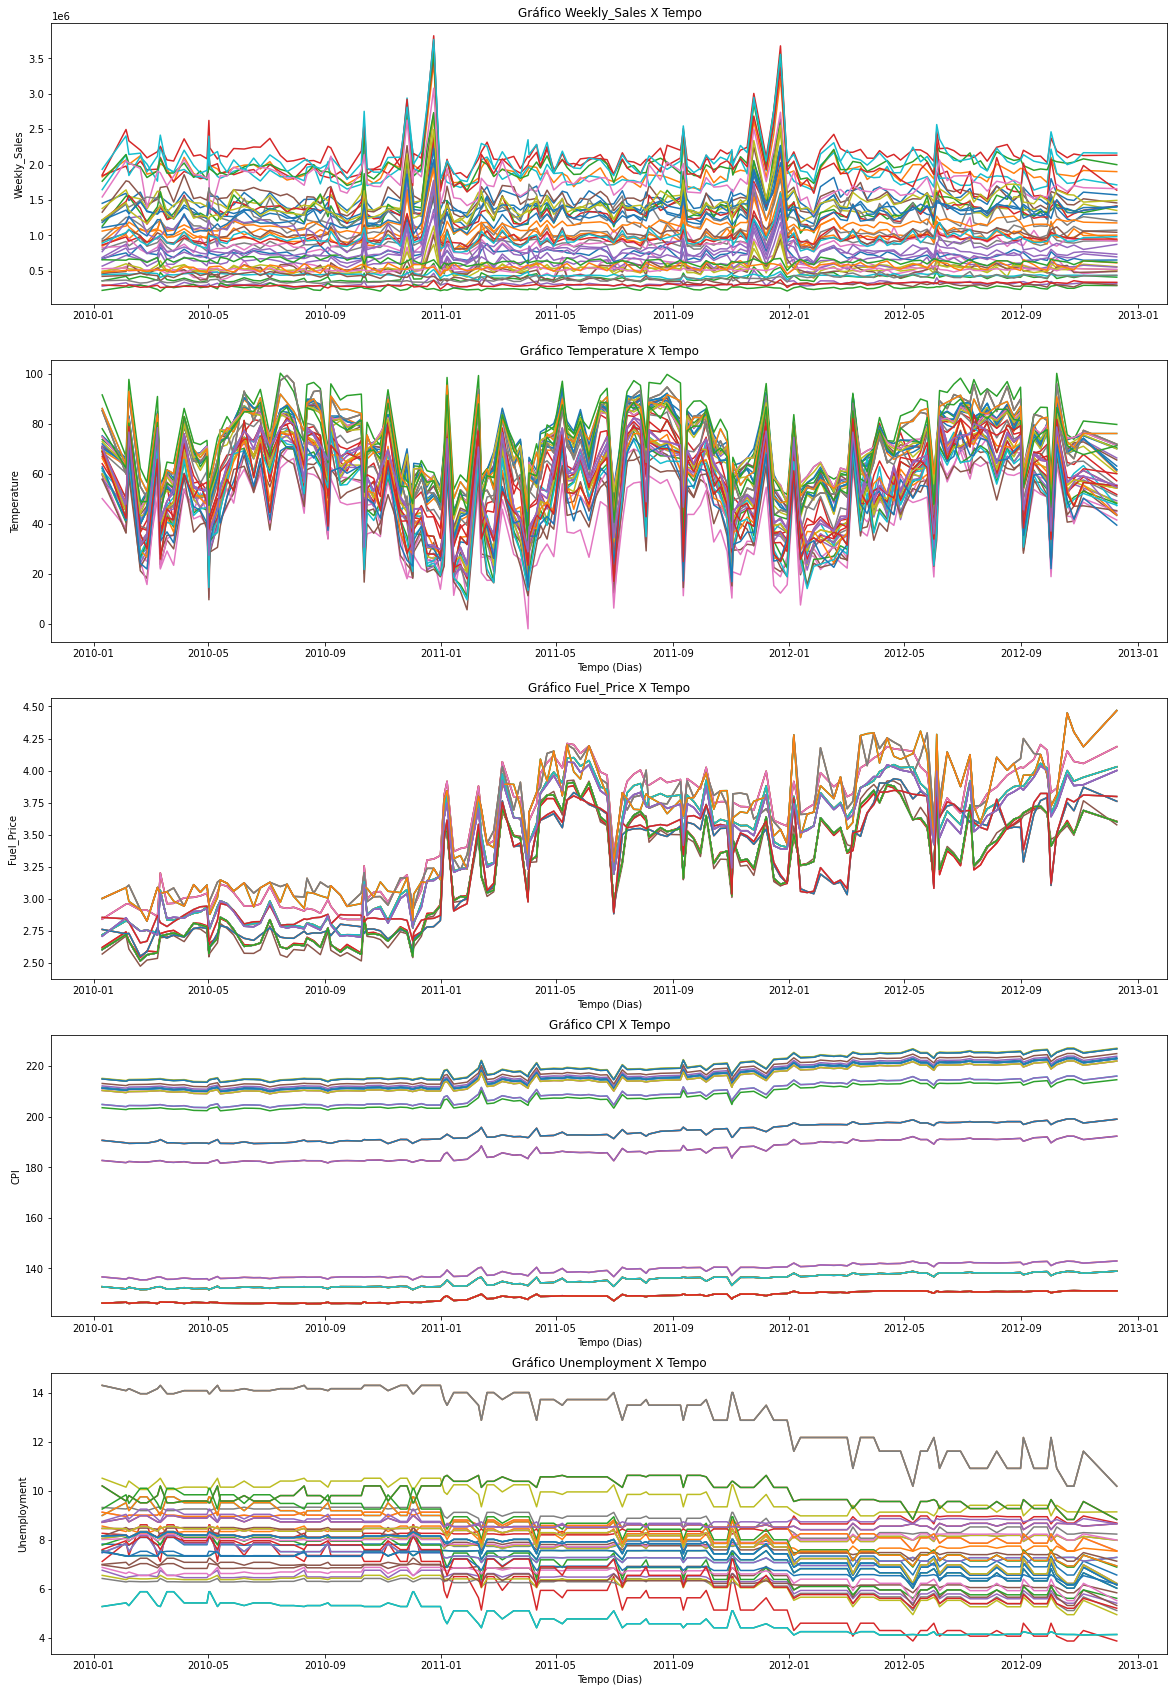

In [6]:
dft = df.copy()
dft.Date = pd.to_datetime(dft.Date)
dft_ordenado = dft.sort_values(by='Date')
l_variaveis = ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]
l_subplots = [511,512,513,514,515]
plt.figure(figsize = (20,30))

index = 0
for variavel in l_variaveis:
    plt.subplot(l_subplots[index])
    for loja in range(1,46):
        dados_loja = dft_ordenado.loc[dft['Store'] == loja]
        plt.plot(dados_loja.Date, dados_loja[variavel])
        plt.title(f"Gráfico {variavel} X Tempo")
        plt.ylabel(variavel)
        plt.xlabel("Tempo (Dias)")
    index += 1
plt.show()

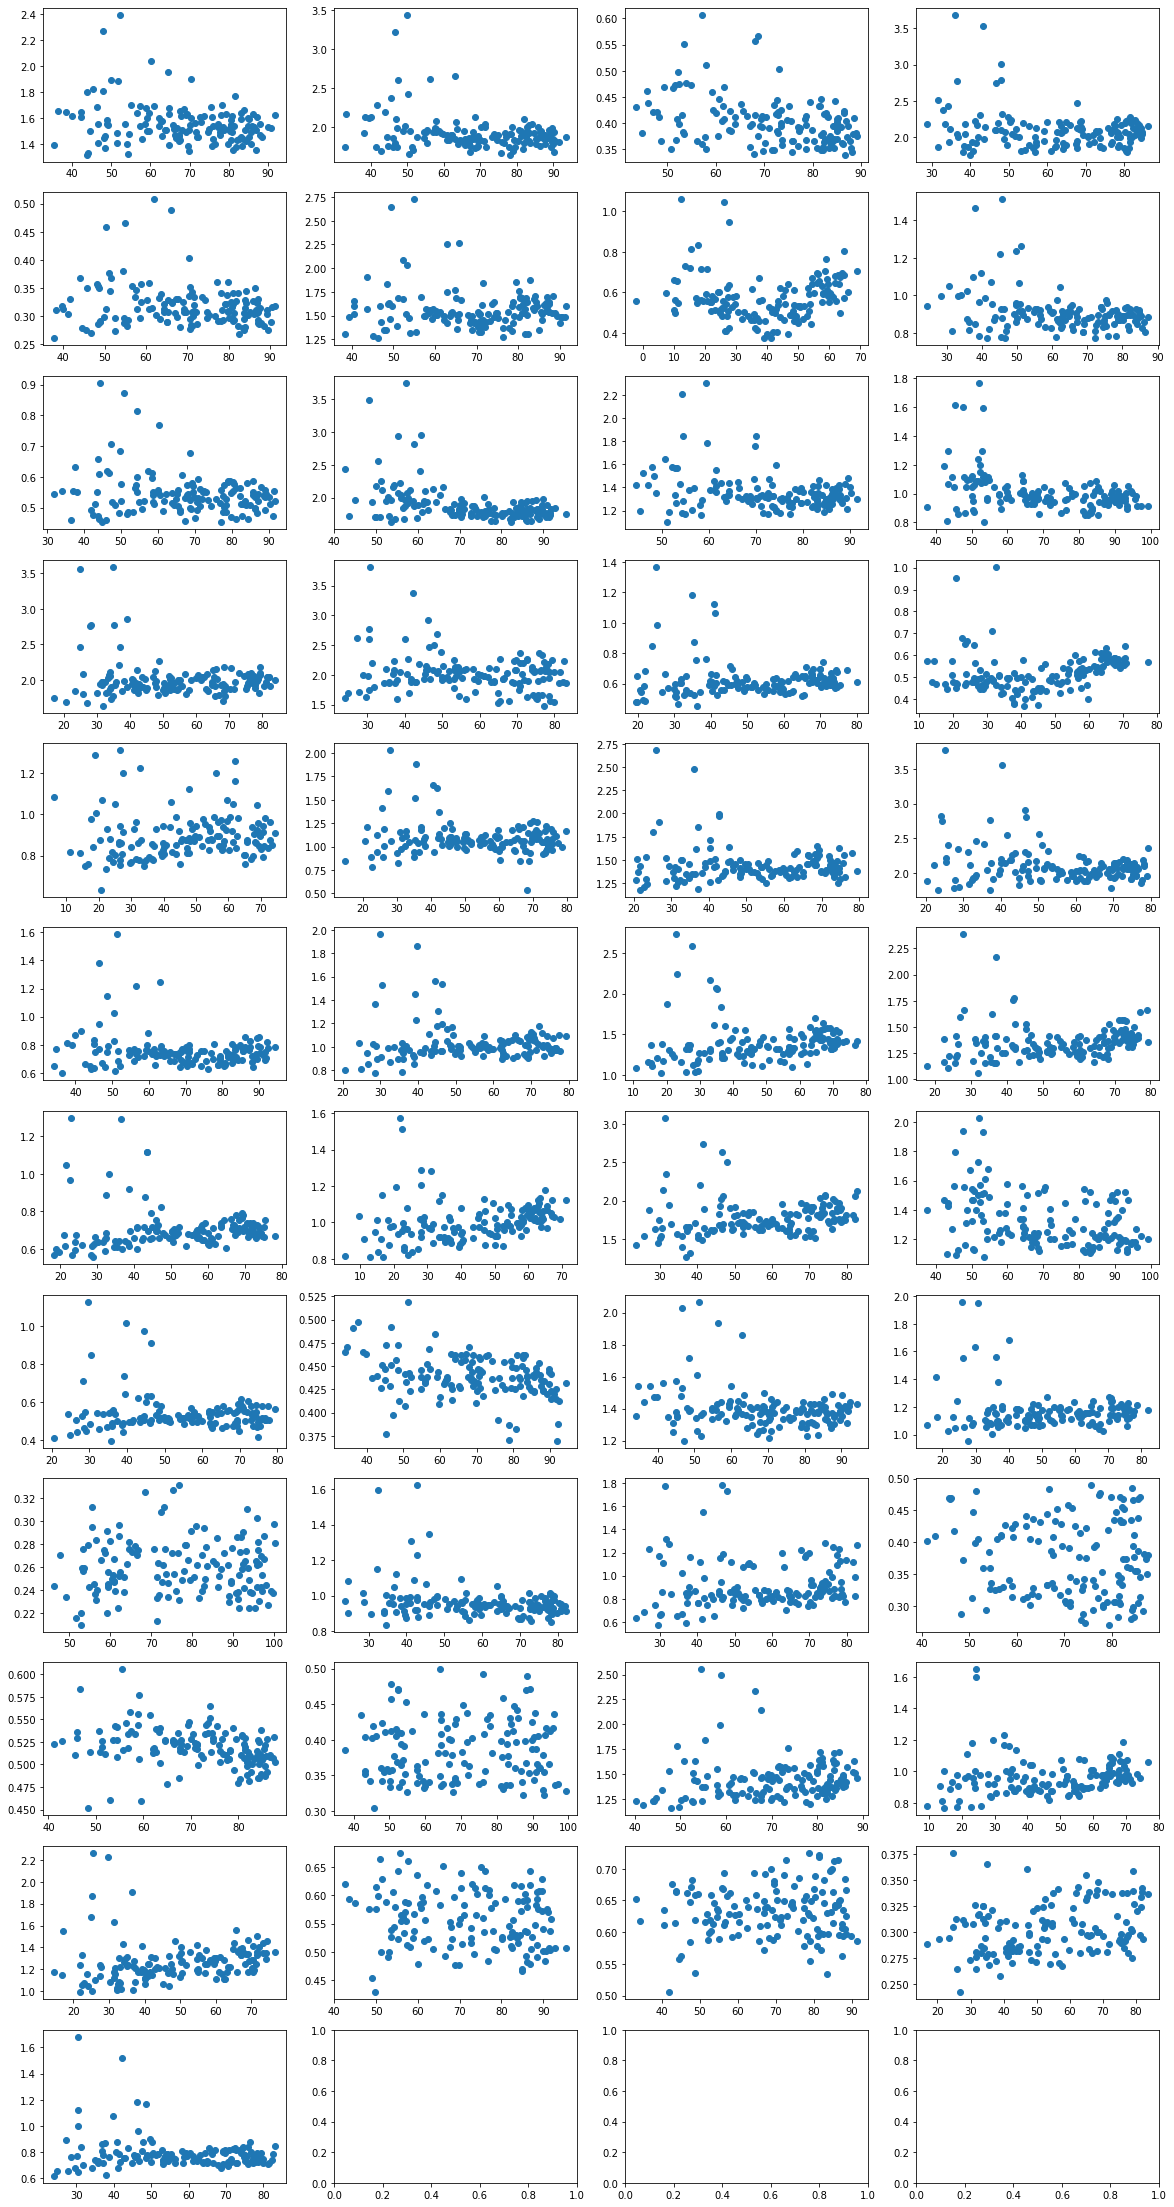

In [7]:
dft.Date = pd.to_datetime(dft.Date)
fig, axs = plt.subplots(12,4)
fig.set_figheight(40)
fig.set_figwidth(20)
index_s = 0
index_p = 0
for loja in range(1,46):
    Dados = dft.loc[df["Store"]==loja,:]
    axs[index_p,index_s].scatter(Dados["Temperature"],Dados["Weekly_Sales"]/1000000) # Weekly_Sales em Milhão
    if index_s == 3:
        index_s = 0
        index_p +=1
    else:
        index_s +=1
plt.show()

In [8]:
dft.Date = pd.to_datetime(dft.Date)
dfo = dft.sort_values(by="Date")
dfo

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
606,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768
2036,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067
5897,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003
4610,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265
5039,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476
...,...,...,...,...,...,...,...,...
5860,41,2012-12-10,1409544.97,0,39.38,3.760,199.053937,6.195
2285,16,2012-12-10,491817.19,0,43.26,3.760,199.053937,5.847
1427,10,2012-12-10,1713889.11,0,76.03,4.468,131.108333,6.943
3572,25,2012-12-10,697317.41,0,43.74,4.000,216.115057,7.293


In [9]:
#Definindo Indicadores - Para Realizar Corr
indicadores = ["Temperature","Fuel_Price","CPI","Unemployment"]
target = "Weekly_Sales"
store = "Store"
#Criando DataFrame de Correlação das Features com Target
Correlation = correlacao(dfo,indicadores, target, store)

#Checando DataFrame para Temperature
Correlation.head(5)

,Temperature,Fuel_Price,CPI,Unemployment
1,-0.222701,0.124592,0.225408,-0.097955
2,-0.297673,-0.196375,-0.062431,0.066325
3,-0.377524,0.140886,0.317250,-0.230413
4,-0.225583,0.211549,0.351157,-0.337015
5,-0.175517,0.167352,0.308261,-0.207043


In [10]:
# Comprovar o Porque de estarmos fazendo essas correlações do Jeito que estamos
# O que estamos procurando e qual metodo vamos usar - Qual Nossa Hipotese?
# Fundamentar o Porque de termos escolhido os IDS que escolhemos - Porque estamos excluindo outras lojas
    # Termos Tecnico

In [11]:
for indicador in indicadores:
    Correlation['Corr_' + indicador] = Correlation[indicador].apply(grupo)
Correlation.head(5)

,Temperature,Fuel_Price,CPI,Unemployment,Corr_Temperature,Corr_Fuel_Price,Corr_CPI,Corr_Unemployment
1,-0.222701,0.124592,0.225408,-0.097955,0,0,0,0
2,-0.297673,-0.196375,-0.062431,0.066325,0,0,0,0
3,-0.377524,0.140886,0.317250,-0.230413,-1,0,1,0
4,-0.225583,0.211549,0.351157,-0.337015,0,0,1,-1
5,-0.175517,0.167352,0.308261,-0.207043,0,0,1,0


In [12]:
Date = lista_datas()
Date_ = []
index1 = [0,0,0,0]
index2 = []
index3 = []
for e in range(len(Date)-1):
    if Date[e][-1] == "0":
        index1.append(Date[e])
    elif Date[e][-1] == "1":
        index2.append(Date[e])
    else:
        index3.append(Date[e])
Date_.append(index1)
Date_.append(index2)
Date_.append(index3)
print(f"Data Inicial: {Date_[0][4]}, Data Limite 2010: {Date_[0][-1]}")
print(f"Data Inicial 2011: {Date_[1][0]} Data Limite 2011: {Date_[1][-1]}")
print(f"Data Inicial 2012: {Date_[2][0]} Data Limite 2011: {Date_[2][-1]}")

Data Inicial: 05-02-2010, Data Limite 2010: 31-12-2010
Data Inicial 2011: 07-01-2011 Data Limite 2011: 30-12-2011
Data Inicial 2012: 06-01-2012 Data Limite 2011: 19-10-2012


In [13]:
# criando dataframes para os anos separadamente

data_2010 = dft.loc[dft["Date"] <= '31/12/2010']
data_2011 = dft.loc[dft["Date"] > '31/12/2010']
data_2011 = data_2011.loc[data_2011['Date'] <= '31/12/2011']
data_2012 = dft.loc[dft["Date"] > '31/12/2011']



In [14]:
WS_2010 = []
Temp_2010 = []
Fuel_2010 = []
CPI_2010 = []
Unemp_2010 = []

WS_2012 = []
Temp_2012 = []
Fuel_2012 = []
CPI_2012 = []
Unemp_2012 = []
for e in range(0,180):
    WS_2010.append(0)
    Temp_2010.append(0)
    Fuel_2010.append(0)
    CPI_2010.append(0)
    Unemp_2010.append(0)
for e in data_2010["Weekly_Sales"]:
    WS_2010.append(e)
for e in data_2010["Temperature"]:
    Temp_2010.append(e)
for e in data_2010["Fuel_Price"]:
    Fuel_2010.append(e)
for e in data_2010["CPI"]:
    CPI_2010.append(e)
for e in data_2010["Unemployment"]:
    Unemp_2010.append(e)

    

for e in data_2012["Weekly_Sales"]:
    WS_2012.append(e)
for e in data_2012["Temperature"]:
    Temp_2012.append(e)
for e in data_2012["Fuel_Price"]:
    Fuel_2012.append(e)
for e in data_2012["CPI"]:
    CPI_2012.append(e)
for e in data_2012["Unemployment"]:
    Unemp_2012.append(e)
for e in range (0,405):
    WS_2012.append(0)
    Temp_2012.append(0)
    Fuel_2012.append(0)
    CPI_2012.append(0)
    Unemp_2012.append(0)
    

DataT = pd.DataFrame()
DataT["Store ID"] = data_2011["Store"]
DataT["WS 2010"] = WS_2010
DataT["WS 2011"] = data_2011["Weekly_Sales"]
DataT["WS 2012"] = WS_2012
DataT["Temp 2010"] = Temp_2010
DataT["Temp 2011"] = data_2011["Temperature"]
DataT["Temp 2012"] = Temp_2012
DataT["Fuel 2010"] = Fuel_2010
DataT["Fuel 2011"] = data_2011["Fuel_Price"]
DataT["Fuel 2012"] = Fuel_2012
DataT["CPI 2010"] = CPI_2010
DataT["CPI 2011"] = data_2011["CPI"]
DataT["CPI 2012"] = CPI_2012
DataT["Unemp 2010"] = Unemp_2010
DataT["Unemp 2011"] = data_2011["Unemployment"]
DataT["Unemp 2012"] = Unemp_2012


Lista_X = []
Lista_Y = []
Lista_Z = []
Lista_M = []
Lista_N = []
Lista_Index = DataT["WS 2010"].index
for e in Lista_Index:
    if DataT["WS 2010"][e] == 0:
        x = (DataT["WS 2011"][e] + DataT["WS 2012"][e])/2
        y = (DataT["Temp 2011"][e] + DataT["Temp 2012"][e])/2
        z = (DataT["Fuel 2011"][e] + DataT["Fuel 2012"][e])/2
        m = (DataT["CPI 2011"][e] + DataT["CPI 2012"][e])/2
        n = (DataT["Unemp 2011"][e] + DataT["Unemp 2012"][e])/2
    elif DataT["WS 2012"][e] == 0:
        x = (DataT["WS 2010"][e] + DataT["WS 2011"][e])/2
        y = (DataT["Temp 2010"][e] + DataT["Temp 2011"][e])/2
        z = (DataT["Fuel 2010"][e] + DataT["Fuel 2011"][e])/2
        m = (DataT["CPI 2010"][e] + DataT["CPI 2011"][e])/2
        n = (DataT["Unemp 2010"][e] + DataT["Unemp 2011"][e])/2
    else:
        x = (DataT["WS 2010"][e] + DataT["WS 2011"][e] + DataT["WS 2012"][e])/3
        y = (DataT["Temp 2010"][e] + DataT["Temp 2012"][e]) + DataT["Temp 2011"][e]/3
        z = (DataT["Fuel 2010"][e] + DataT["Fuel 2012"][e]) + DataT["Fuel 2011"][e]/3
        m = (DataT["CPI 2010"][e] + DataT["CPI 2012"][e]) + DataT["CPI 2011"][e]/3
        n = (DataT["Unemp 2010"][e] + DataT["Unemp 2012"][e]) + DataT["Unemp 2011"][e]/3
    Lista_X.append(x)
    Lista_Y.append(y)
    Lista_Z.append(z)
    Lista_M.append(m)
    Lista_N.append(n)
    
    
Average = pd.DataFrame()
Average["Store ID"] = data_2011["Store"]
Average["Avr WS"] = Lista_X
Average["Avr Temp"] = Lista_Y
Average["Avr Fuel"] = Lista_Z
Average["Avr CPI"] = Lista_M
Average["Avr Unemp"] = Lista_N
Average.head(5)

,Store ID,Avr WS,Avr Temp,Avr Fuel,Avr CPI,Avr Unemp
48,1,1497551.100,48.640,3.0665,215.559500,7.545
49,1,1425307.565,41.965,3.1220,215.674969,7.545
50,1,1360899.630,49.075,3.1420,215.906462,7.545
51,1,1318112.450,49.045,3.1500,216.137955,7.545
52,1,1621484.615,49.410,3.1745,216.369448,7.545


In [15]:
indicadores = ["Avr Temp","Avr Fuel", "Avr CPI", "Avr Unemp"]
target = "Avr WS"
store = "Store ID"
Average_Corr = correlacao(Average, indicadores, target, store)
Average_Corr

,Avr Temp,Avr Fuel,Avr CPI,Avr Unemp
1,-0.385470,-0.150815,0.253445,0.058035
2,0.312047,0.484127,-0.707416,0.346999
3,-0.483220,-0.067440,-0.991568,-0.966945
4,-0.536774,-0.585373,-0.630713,-0.605734
5,0.163041,0.418692,0.203006,0.193056
6,-0.708260,-0.064903,-0.171687,0.405203
7,0.357541,-0.163539,-0.938420,-0.008278
8,-0.055858,-0.046117,-0.842211,0.583632
9,-0.170990,0.313271,0.020394,0.021282
10,-0.562863,-0.571562,0.185462,-0.729254


#### Agrupando as correlações por grupo

In [16]:
for indicador in indicadores:
    Average_Corr['Corr_' + indicador] = Average_Corr[indicador].apply(grupo)
Average_Corr.head(5)

,Avr Temp,Avr Fuel,Avr CPI,Avr Unemp,Corr_Avr Temp,Corr_Avr Fuel,Corr_Avr CPI,Corr_Avr Unemp
1,-0.385470,-0.150815,0.253445,0.058035,-1,0,0,0
2,0.312047,0.484127,-0.707416,0.346999,1,1,-1,1
3,-0.483220,-0.067440,-0.991568,-0.966945,-1,0,-1,-1
4,-0.536774,-0.585373,-0.630713,-0.605734,-1,-1,-1,-1
5,0.163041,0.418692,0.203006,0.193056,0,1,0,0


### Preparando a regressão linear

In [17]:
Average

,Store ID,Avr WS,Avr Temp,Avr Fuel,Avr CPI,Avr Unemp
48,1,1497551.100,48.640,3.0665,215.559500,7.5450
49,1,1425307.565,41.965,3.1220,215.674969,7.5450
50,1,1360899.630,49.075,3.1420,215.906462,7.5450
51,1,1318112.450,49.045,3.1500,216.137955,7.5450
52,1,1621484.615,49.410,3.1745,216.369448,7.5450
...,...,...,...,...,...,...
6387,45,877472.355,45.560,3.2490,185.585025,8.6235
6388,45,979759.825,38.555,3.2620,185.603211,8.6235
6389,45,1101094.265,35.220,3.2765,185.657833,8.6235
6390,45,1602410.010,36.430,3.2650,185.737283,8.6235


In [18]:
X = Average[['Avr Temp', 'Avr Fuel', 'Avr CPI', 'Avr Unemp']]
Y = Average['Avr WS']

In [19]:
def regressao_tipada(df,loja):
    df_r = df.loc[df['Store ID']== loja, :]
    X = df_r[['Avr Temp','Avr Fuel','Avr CPI','Avr Unemp']]
    Y = df_r['Avr WS']
    results = regress(Y,X)
    return results

loja1 = regressao_tipada(Average,1)
loja1.pvalues

NameError: name 'sm' is not defined

#### Separando o conjunto de dados, base de teste e base de treinamento

In [76]:
X = Average[['Avr Temp', 'Avr Fuel', 'Avr CPI', 'Avr Unemp']]
Y = Average['Avr WS']

# vetores que receberam as informações separadas por lojas
Xi = []
Yi = []
# percorrendo loja a loja, temos:
# vamos utilizar a base de teste com um size de 18%
for loja in range(1,46):
    dff = Average.loc[Average['Store ID'] == loja, :]
    x = dff[['Avr Temp','Avr Fuel','Avr CPI','Avr Unemp']]
    y = dff['Avr WS']
    X_train,X_test,y_train,y_test=train_test_split(x,y, random_state=42,test_size=0.18)
    Xi.append([X_train,X_test])
    Yi.append([y_train,y_test])

#### Primeiro Modelo: Regressão Linear

In [77]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Xi[0][0], Yi[0][0])

# Make predictions using the testing set
sales_y_pred = regr.predict(Xi[0][1])

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Yi[0][1], sales_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Yi[0][1], sales_y_pred))

Coefficients: 
 [ -5646.96804851  40005.99316984  78886.23147526 586204.13577249]
Mean squared error: 17622311633.52
Coefficient of determination: 0.52


#### Referencias 

<Br> https://scikit-learn.org/stable/modules/linear_model.html
<Br> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html